In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
kiddata = pd.read_csv('Kid.csv')

In [7]:
kiddata.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [9]:
kiddata.shape

(673, 18)

In [12]:
kiddata.drop(columns = "Obs No.")

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
5,0,24000,1,1,0,0,0,0,41,0,0,1,1,0,0,0,0
6,0,26000,1,1,1,0,1,0,20,0,1,1,1,1,1,0,0
7,0,38000,1,1,0,0,1,0,8,0,0,1,1,1,1,0,0
8,0,39000,1,0,1,1,0,0,17,0,0,0,0,1,1,0,0
9,0,49000,0,1,0,0,1,0,31,0,0,1,1,1,1,0,0


In [13]:
kiddata.isnull()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
kiddata.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [15]:
kiddataset.Buy.value_counts()

0    548
1    125
Name: Buy, dtype: int64

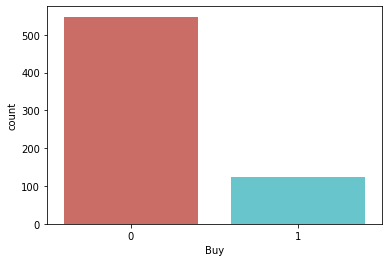

In [16]:
sns.countplot(x='Buy',data = kiddata, palette = 'hls')

In [17]:
plt.show()

In [20]:
x = kiddata[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = kiddata['Buy']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 0)

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(x_train,y_train)      # Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction_test = logreg.predict(x_test)

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test , prediction_test)

In [32]:
confusion_matrix

array([[106,   8],
       [  3,  18]], dtype=int64)

In [46]:
# Visulization of confusion matrix
fig, ax = plt.subplots()
tick_marks  = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame('confusion_matrix'),annot = 1 , cmap = 'viridis',fmt= 'g')
ax.xaxis.set_label_position('top')
plt.tight.layout()



In [47]:
# Model Evaluation using confusion matrix
print('Accuracy:',metrics.accuracy_score(y_test,prediction_test))

Accuracy: 0.9185185185185185


In [48]:
print('Precision:',metrics.precision_score(y_test,prediction_test))

Precision: 0.6923076923076923


In [49]:
print('Recall:',metrics.recall_score(y_test,prediction_test))

Recall: 0.8571428571428571


In [50]:
#now 
print('Accuracy:',metrics.accuracy_score(y_test,prediction_test))
print('Precision:',metrics.precision_score(y_test,prediction_test))
print('Recall:',metrics.recall_score(y_test,prediction_test))

Accuracy: 0.9185185185185185
Precision: 0.6923076923076923
Recall: 0.8571428571428571


AUC: 0.9477861319966583


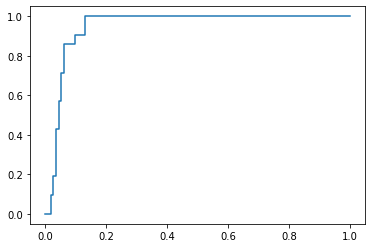

In [56]:
# ROC Curve
prediction_probability = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ =metrics.roc_curve(y_test, prediction_probability)
auc = metrics.roc_auc_score(y_test,prediction_probability)
print('AUC:',auc)
plt.plot(fpr,tpr)